# Import Libraries &  Dataset

In [438]:
pip install colorama

In [439]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from colorama import Fore
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [440]:
# The following snippet is required to mount your gdrive on colab. After the snippet is executed, you will see a link. Upon clicking the link, you will be taken to a webpage where you will find the access key. Copy and paste the access key and press enter. 
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [441]:
df = pd.read_csv('/content/gdrive/My Drive/Aquifer_Petrignano.csv') #Index will date no more numbers starting from zero

# Aquifer Petrignano

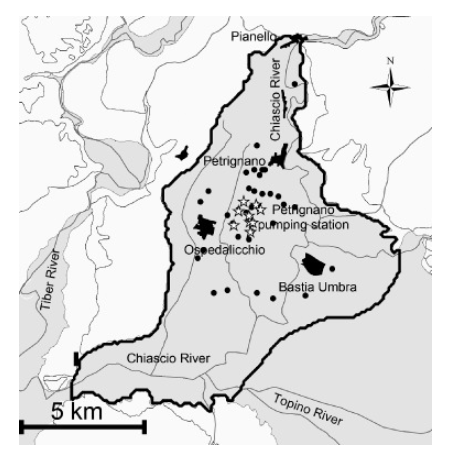

# Data Analysis

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [443]:
print('Starting date  :' , df['Date'].iloc[0],
      '\nEnding Date is : ',df["Date"].iloc[-1])

Starting date  : 14/03/2006 
Ending Date is :  30/06/2020


In [444]:
print('No: of rows in the dataset', df.shape[0],
      '\nNo:of columns :' , df.shape[1])

No: of rows in the dataset 5223 
No:of columns : 8


## Handling Highly Correlated Feature and Target

In [445]:
column_1 = df['Depth_to_Groundwater_P25']
column_2 = df['Depth_to_Groundwater_P24']
corr_1 = column_1.corr(column_2)
corr_1


0.9975061270323151

In [446]:
column_3 = df['Temperature_Bastia_Umbra']
column_4 = df['Temperature_Petrignano']
corr_2 = column_3.corr(column_4)
corr_2


0.8357543382616249

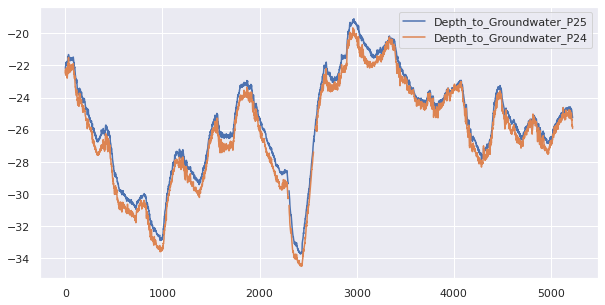

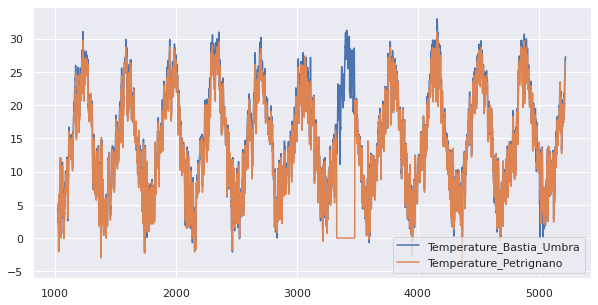

In [447]:
df[['Depth_to_Groundwater_P25','Depth_to_Groundwater_P24']].plot(figsize=(10,5))
df[['Temperature_Bastia_Umbra','Temperature_Petrignano']].plot(figsize=(10,5))


In [448]:
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

## Missing  Data

In [449]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P25',
       'Temperature_Bastia_Umbra', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [450]:
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
Date,0
Rainfall_Bastia_Umbra,1024
Depth_to_Groundwater_P25,39
Temperature_Bastia_Umbra,1024
Volume_C10_Petrignano,198
Hydrometry_Fiume_Chiascio_Petrignano,1024


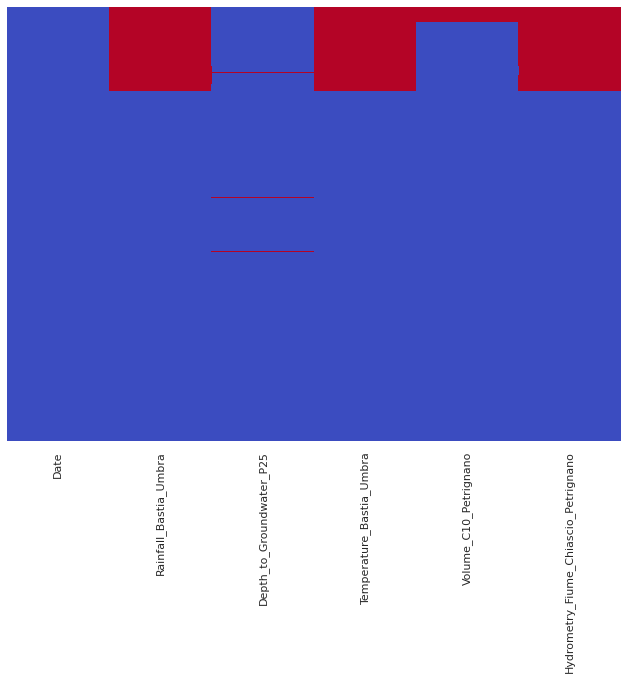

In [451]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

In [452]:
import missingno as msno

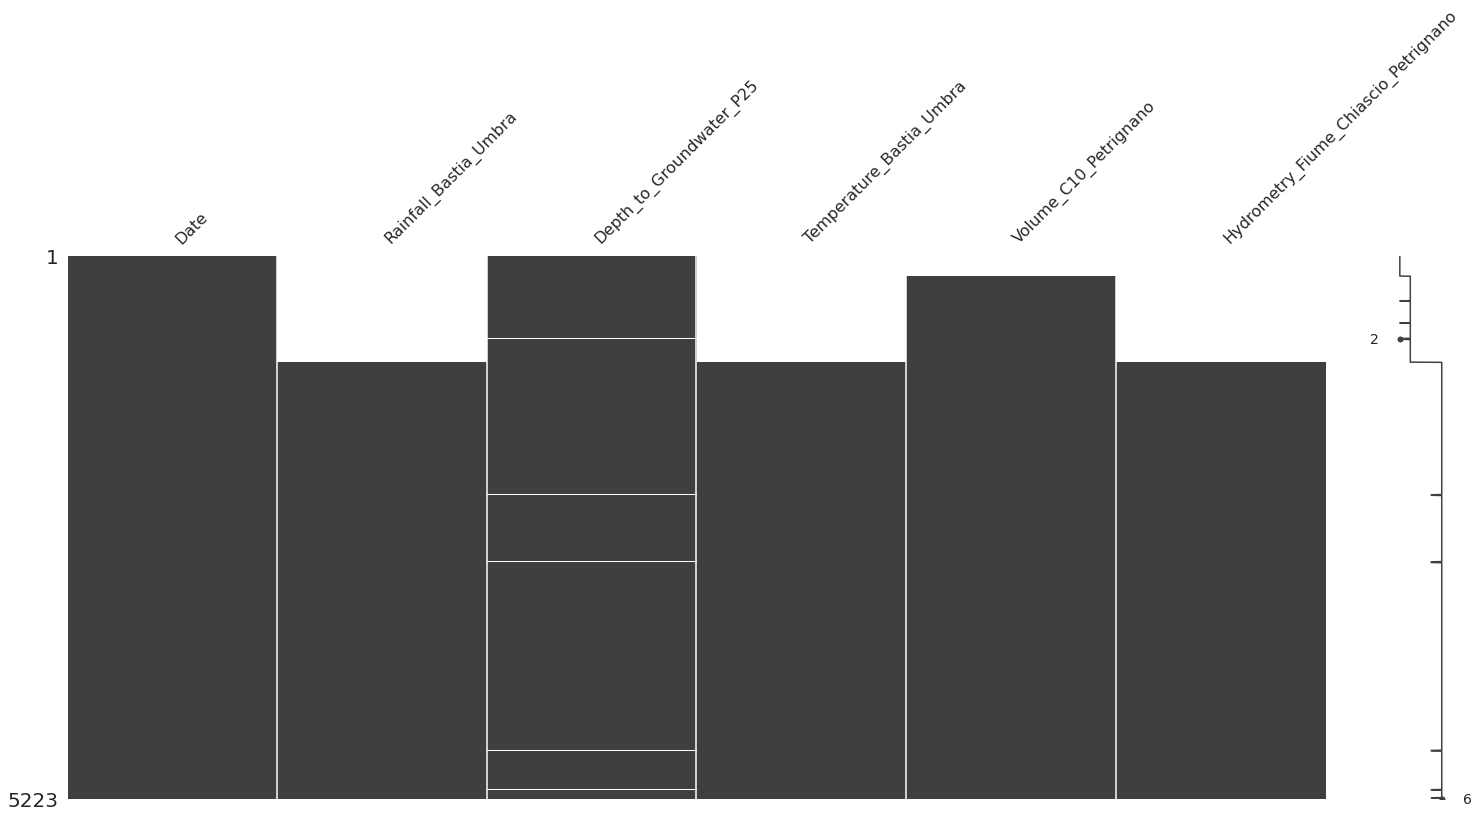

In [453]:
msno.matrix(df)

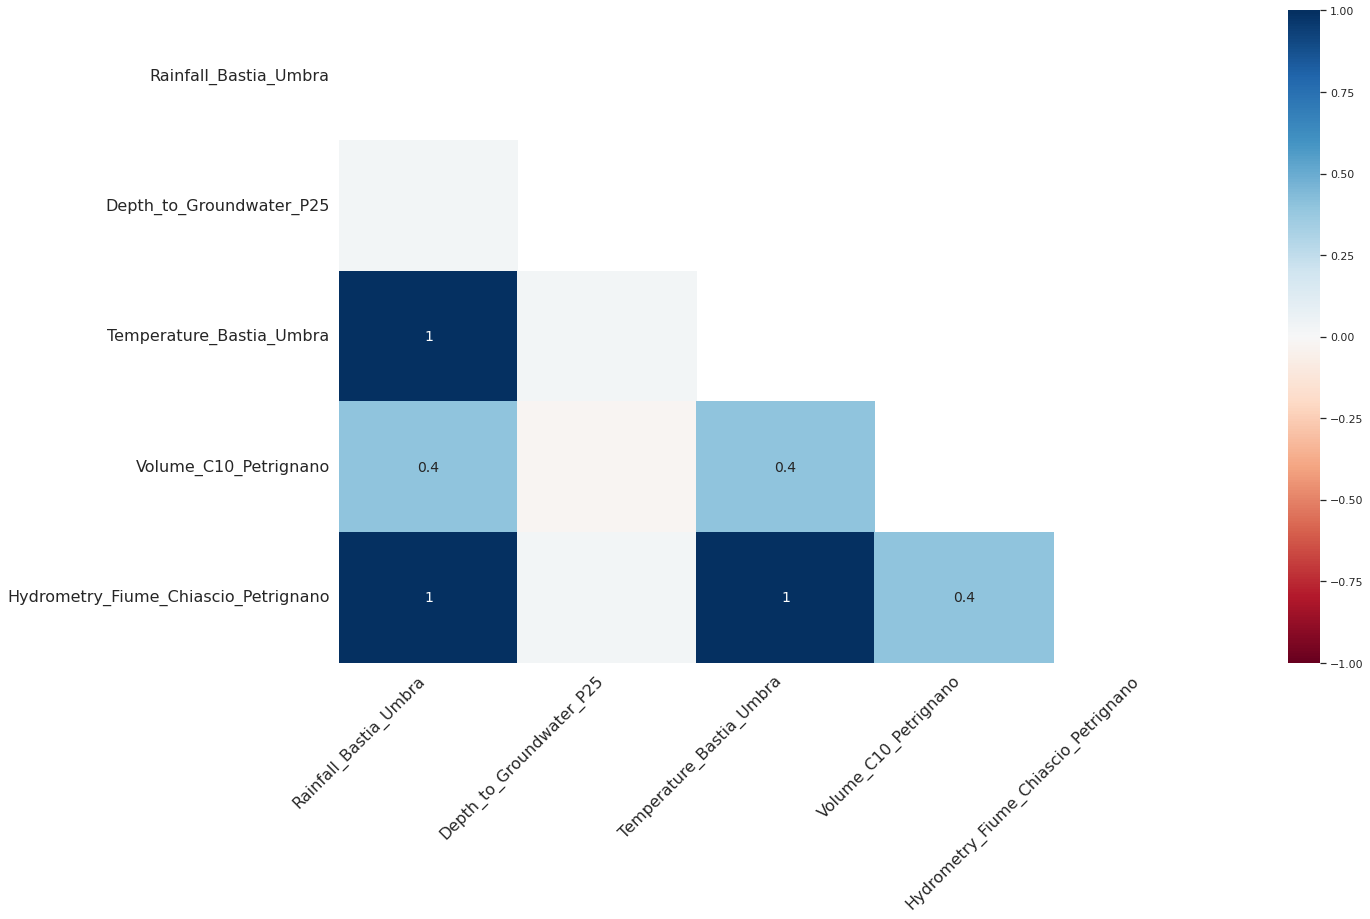

In [454]:
msno.heatmap(df)

The head part of the dataset is having null values, if those are removed then there will not be any impact.

In [455]:
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

In [456]:
print('Starting date After Deletion of old  missing data is :' ,      
      df['Date'].iloc[0],
      '\nEnding Date  After Deletion of old missing data is : ',      
      df['Date'].iloc[-1])

Starting date After Deletion of old  missing data is : 01/01/2009 
Ending Date  After Deletion of old missing data is :  30/06/2020


In [457]:
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
Date,0
Rainfall_Bastia_Umbra,0
Depth_to_Groundwater_P25,27
Temperature_Bastia_Umbra,0
Volume_C10_Petrignano,1
Hydrometry_Fiume_Chiascio_Petrignano,0


In [458]:
print('New No: of rows in the dataset', df.shape[0],
      '\nNo:of columns :' , df.shape[1])

New No: of rows in the dataset 4199 
No:of columns : 6


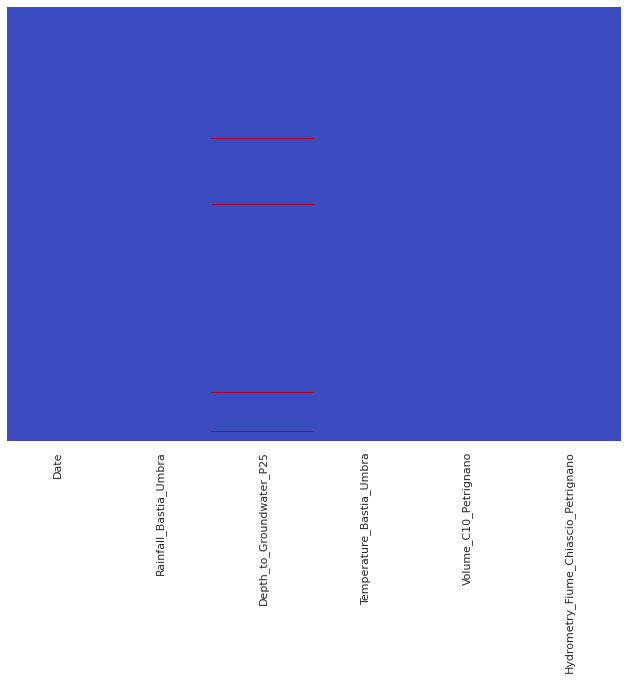

In [459]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

In [460]:
df.shape

(4199, 6)

# Customising Column Name for Simplicity

In [461]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P25',
       'Temperature_Bastia_Umbra', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [462]:
df.columns = ['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Drainage_volume', 'River_hydrometry']

In [463]:
df.head()

,Date,Rainfall,Depth_to_groundwater,Temperature,Drainage_volume,River_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


# Data Preprocessing

## Setting Date as Index

In [464]:
'''
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Date'].head(2).style.set_properties(subset=['Date'], **{'background-color': 'lightblue'})
'''

"\nfrom datetime import datetime, date \n\ndf['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')\ndf['Date'].head(2).style.set_properties(subset=['Date'], **{'background-color': 'lightblue'})\n"

In [465]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Date'].head(2)

0   2009-01-01
1   2009-01-02
Name: Date, dtype: datetime64[ns]

In [466]:
df.tail()

,Date,Rainfall,Depth_to_groundwater,Temperature,Drainage_volume,River_hydrometry
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4
4198,2020-06-30,0.0,-25.25,27.3,-31878.144,2.4


## Chronological Order and Equidistant Timestamps

For finding the difference of date, we can create a column name Delta which have difference of a date with previous date.

First column will not be applicable.

In [467]:
df = df.sort_values(by='Date')

# Check time intervals
df['Delta'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Delta']].head()

,Date,Delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [468]:
df.shape[0]

4199

In [469]:
df['Delta'].value_counts()

1 days    4198
Name: Delta, dtype: int64

In [470]:
df['Delta'].sum(), df['Delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

In [471]:
df = df.drop('Delta', axis=1)

**The time interval is one day and the data is already in chronological order.**


# Differentiating target and features

In [472]:
targets = ['Depth_to_Groundwater']
#features = [feature for feature in df.columns if feature not in targets]
features = ['Date', 'Rainfall', 'Temperature', 'Drainage_volume', 'River_hydrometry']
features

['Date', 'Rainfall', 'Temperature', 'Drainage_volume', 'River_hydrometry']

In [473]:
features

['Date', 'Rainfall', 'Temperature', 'Drainage_volume', 'River_hydrometry']

# Visualisation of features

*   To complete the data for visualisation(as naive method), we will use ffill

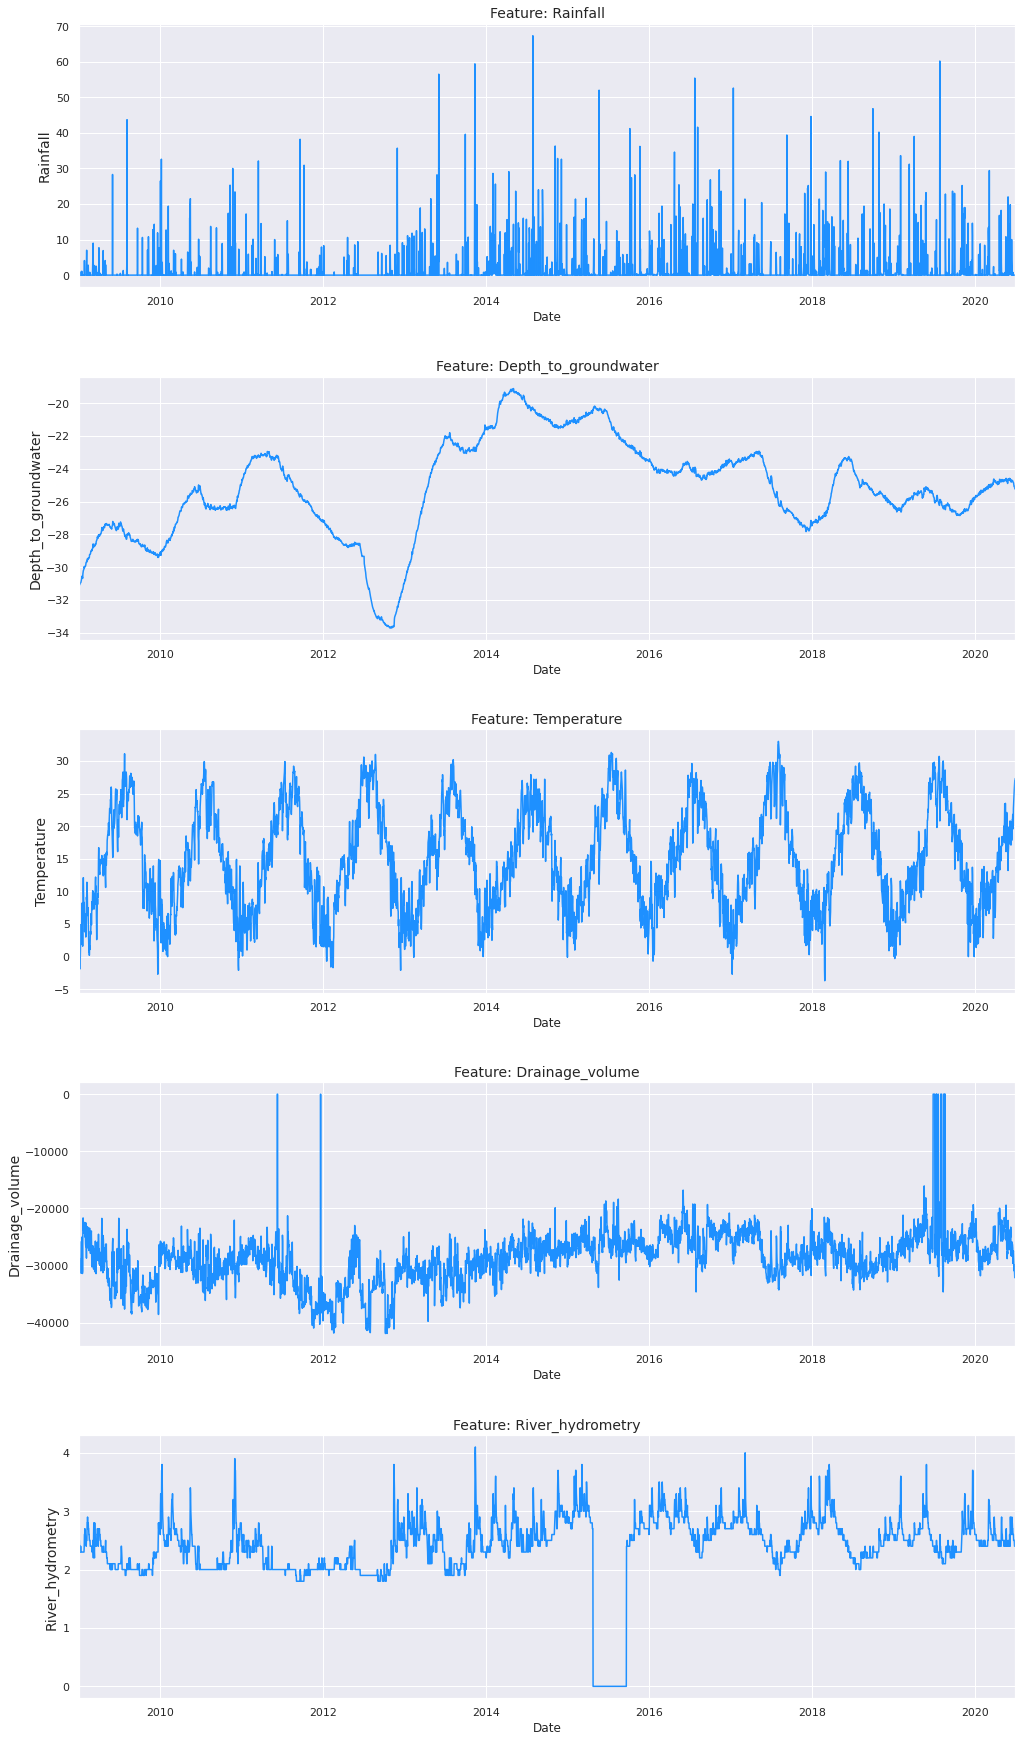

In [474]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    f.tight_layout(pad=3.0)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)]) 

There are some zero values for Drainage_volume[Volume C10 Petrignano], and River_hydrometry[Hydrometry_Fiume_Chiascio_Petrignano]

In [475]:
df.columns

Index(['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature',
       'Drainage_volume', 'River_hydrometry'],
      dtype='object')

# Missing Value and Zero values of Drainage_volume, and River_hydrometry

In [476]:
df.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_groundwater    27
Temperature              0
Drainage_volume          1
River_hydrometry         0
dtype: int64

27 Missing Value for Depth_to_groundwater and 1 missing value for Drainage_volume[Volume C10 Petrignano].

Note :- Delta is column created to check date difference and 1st column value will be null.

## Handling Missing Value and zero values of Drainage_volume[Volume C10 Petrignano].

(733408.0, 737606.0)

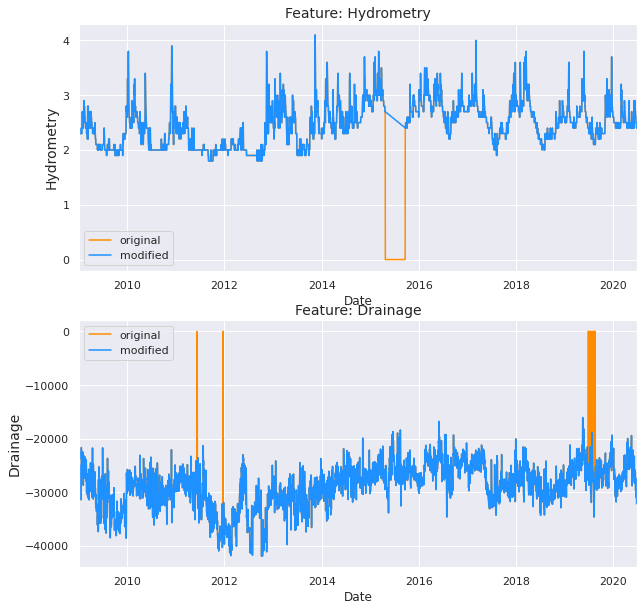

In [477]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

old_hydrometry = df['River_hydrometry'].copy()
df['River_hydrometry'] = df['River_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['Date'], y=df['River_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['Drainage_volume'].copy()
df['Drainage_volume'] = df['Drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['Date'], y=df['Drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

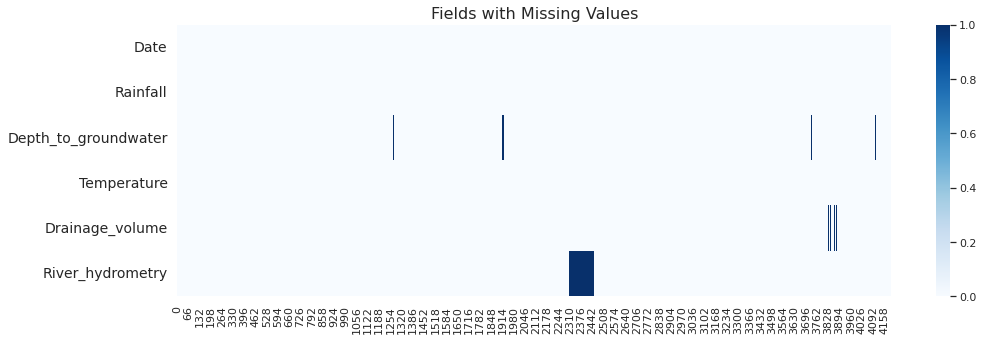

In [478]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

Outlier or Zero 
Mean
Ffill
interplota 

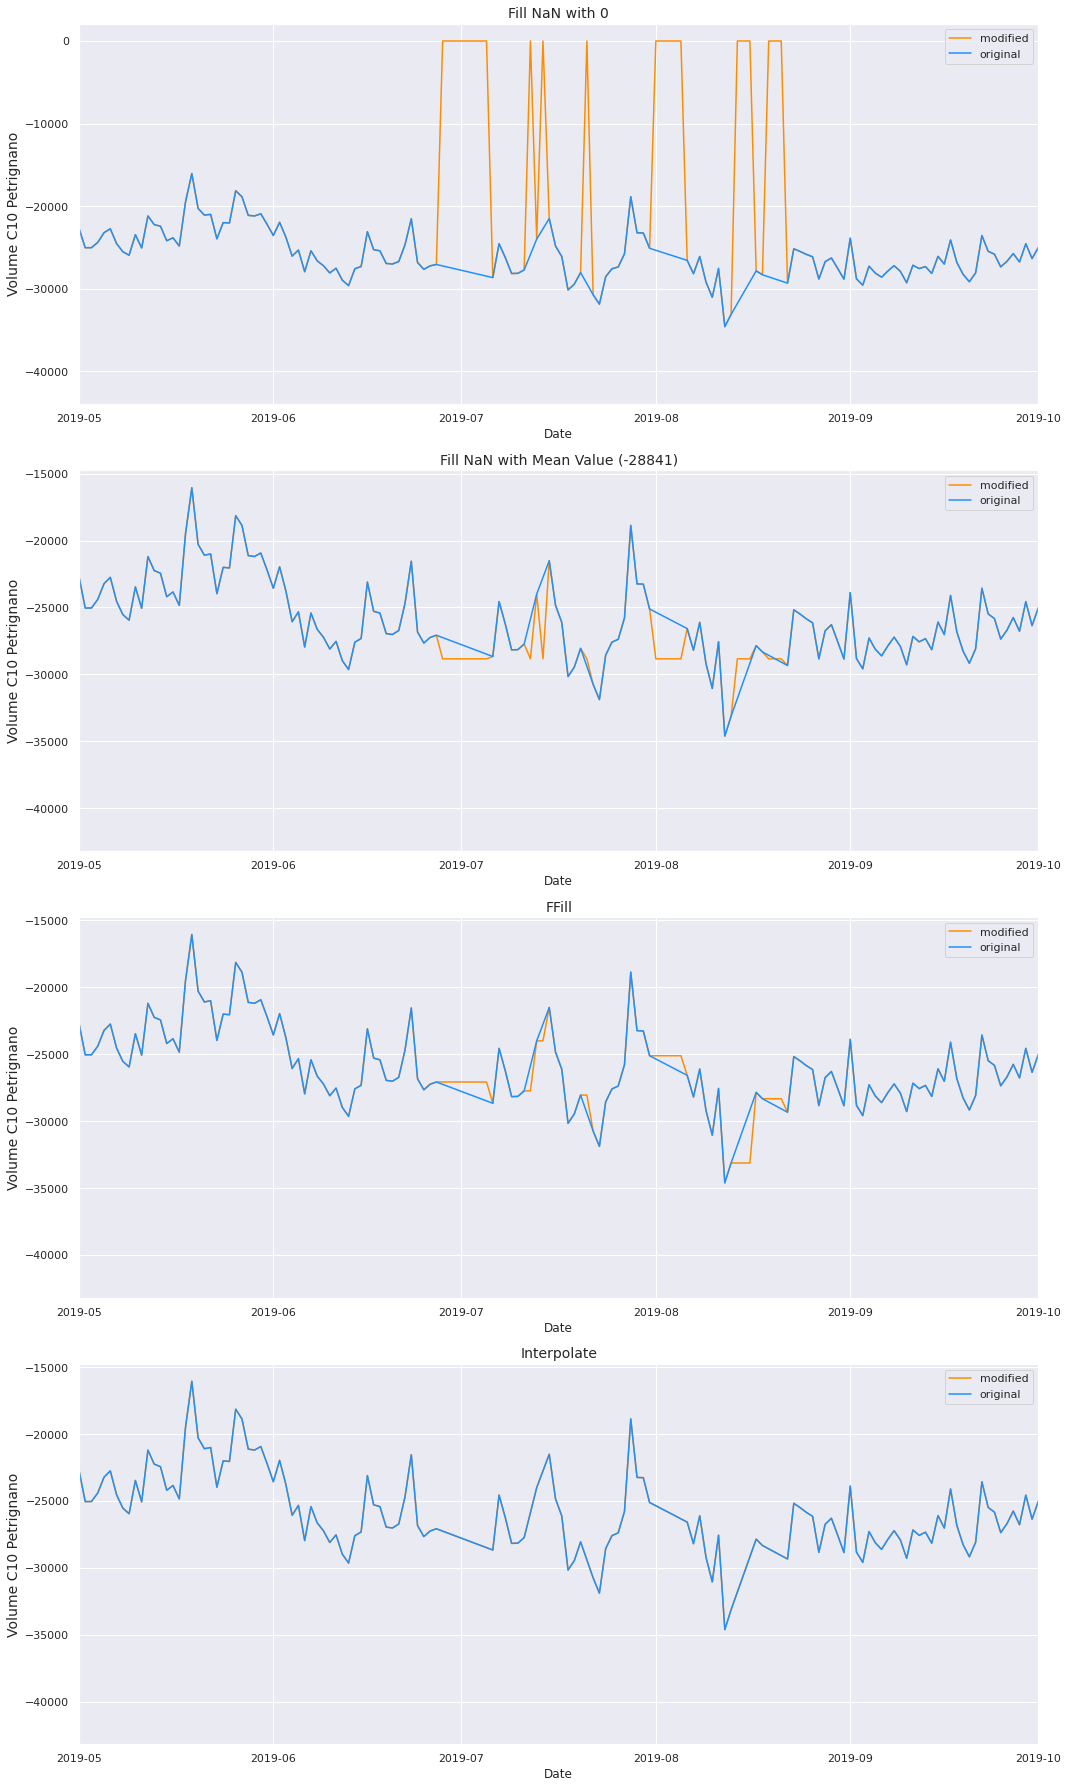

In [479]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.lineplot(x=df['Date'], y=df['Drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['Drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['Drainage_volume'].mean()
sns.lineplot(x=df['Date'], y=df['Drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['Drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['Date'], y=df['Drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['Drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['Date'], y=df['Drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['Drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [480]:
df['Drainage_volume'] = df['Drainage_volume'].interpolate()
df['River_hydrometry'] = df['River_hydrometry'].interpolate()
df['Depth_to_groundwater'] = df['Depth_to_groundwater'].interpolate()

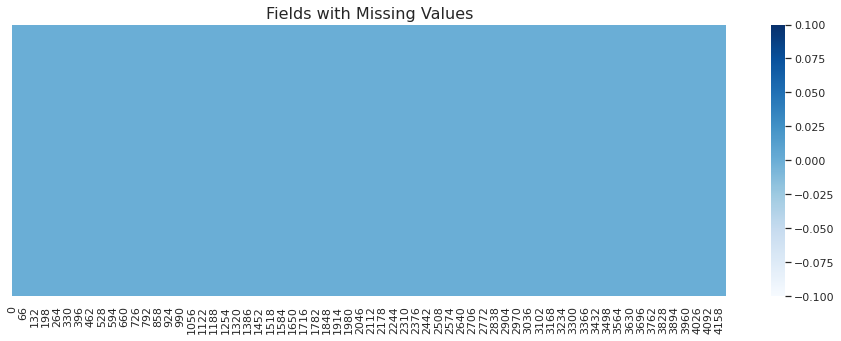

In [481]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), yticklabels=False, cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [482]:
df.isnull().sum().sum()

0

# Resampling

In [483]:
df.columns

Index(['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature',
       'Drainage_volume', 'River_hydrometry'],
      dtype='object')

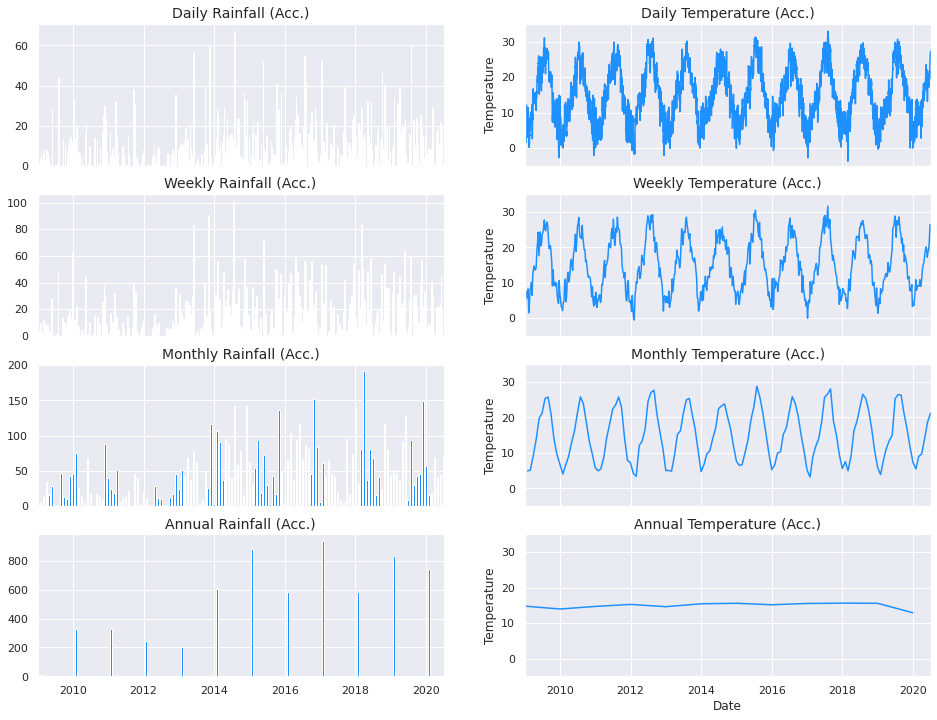

In [484]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,12))

ax[0, 0].bar(df.Date, df.Rainfall, width=5, color='dodgerblue')
ax[0, 0].set_title('Daily Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date','Rainfall']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[1, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=10, color='dodgerblue')
ax[1, 0].set_title('Weekly Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date','Rainfall']].resample('M', on='Date').sum().reset_index(drop=False)
ax[2, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=15, color='dodgerblue')
ax[2, 0].set_title('Monthly Rainfall (Acc.)', fontsize=14)

resampled_df = df[['Date','Rainfall']].resample('12M', on='Date').sum().reset_index(drop=False)
ax[3, 0].bar(resampled_df.Date, resampled_df.Rainfall, width=20, color='dodgerblue')
ax[3, 0].set_title('Annual Rainfall (Acc.)', fontsize=14)

for i in range(4):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(df.Date, df.Temperature, color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date','Temperature']].resample('7D', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df.Date, resampled_df.Temperature, color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date','Temperature']].resample('M', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df.Date, resampled_df.Temperature, color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

resampled_df = df[['Date','Temperature']].resample('365D', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df.Date, resampled_df.Temperature, color='dodgerblue', ax=ax[3, 1])
ax[3, 1].set_title('Annual Temperature (Acc.)', fontsize=14)

for i in range(4):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_ylim([-5, 35])
plt.show()

In [485]:
df_downsampled = df[['Date',
                     'Depth_to_groundwater', 
                     'Temperature',
                     'Drainage_volume', 
                     'River_hydrometry'
                    ]].resample('7D', on='Date').mean().reset_index(drop=False)

df_downsampled['Rainfall'] = df[['Date',
                                 'Rainfall'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Rainfall']]

df = df_downsampled

In [486]:
df.head()

,Date,Depth_to_groundwater,Temperature,Drainage_volume,River_hydrometry,Rainfall
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.0
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,2.0
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.2
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,4.1
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,9.9


#Stationarity

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

constant mean and mean is not time-dependent
constant variance and variance is not time-dependent
constant covariance and covariance is not time-dependent
If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time

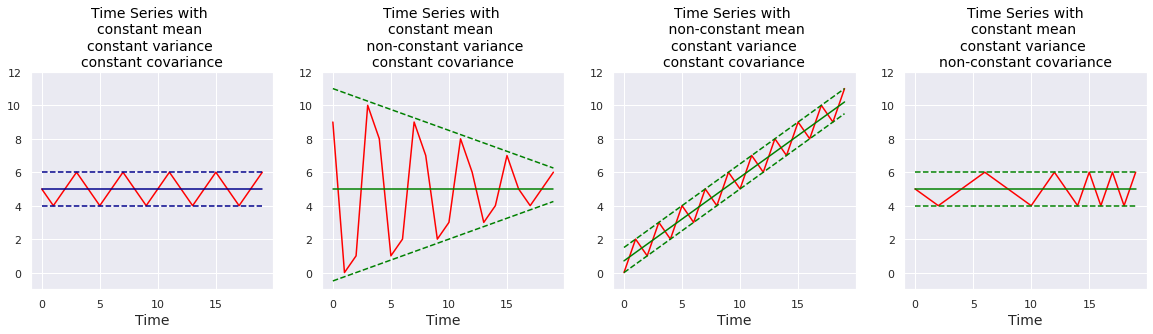

In [487]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='red')
sns.lineplot(x=t, y=5, ax=ax[0], color='darkblue')
sns.lineplot(x=t, y=6, ax=ax[0], color='darkblue')
sns.lineplot(x=t, y=4, ax=ax[0], color='darkblue')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Time Series with \nconstant mean \nconstant variance \nconstant covariance', fontsize=14,color='black')

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='red' )
sns.lineplot(x=t, y=5, ax=ax[1], color='green')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='green')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='green')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Time Series with \nconstant mean \n non-constant variance\nconstant covariance', fontsize=14,color='black')

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='red' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='green')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='green')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='green')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Time Series with \n non-constant mean\nconstant variance\nconstant covariance', fontsize=14,color='black')

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='red')
sns.lineplot(x=t, y=5, ax=ax[3], color='green')
sns.lineplot(x=t, y=6, ax=ax[3], color='green')
sns.lineplot(x=t, y=4, ax=ax[3], color='green')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Time Series with\nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14,color='black')

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

The check for stationarity can be done via three different approaches:

visually: plot time series and check for trends or seasonality

basic statistics: split time series and compare the mean and variance of each partition

statistical test: Augmented Dickey Fuller test

### Visual Test

In [488]:
df.columns

Index(['Date', 'Depth_to_groundwater', 'Temperature', 'Drainage_volume',
       'River_hydrometry', 'Rainfall'],
      dtype='object')

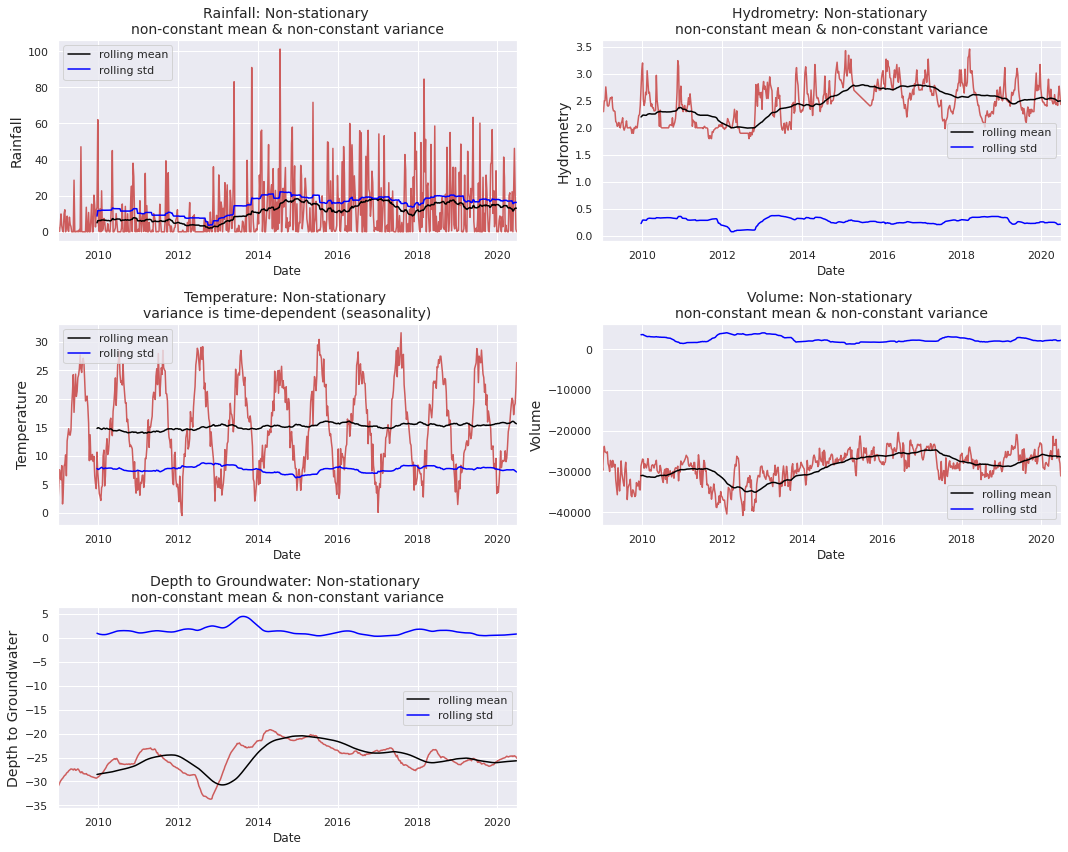

In [489]:
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

sns.lineplot(x=df.Date, y=df.Rainfall, ax=ax[0, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Rainfall.rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Rainfall.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.lineplot(x=df.Date, y=df.Temperature, ax=ax[1, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Temperature.rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Temperature.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=df.Date, y=df.River_hydrometry, ax=ax[0, 1], color='indianred')
sns.lineplot(x=df.Date, y=df.River_hydrometry.rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.River_hydrometry.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df.Date, y=df.Drainage_volume, ax=ax[1, 1], color='indianred')
sns.lineplot(x=df.Date, y=df.Drainage_volume.rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Drainage_volume.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.Date, y=df.Depth_to_groundwater, ax=ax[2, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Depth_to_groundwater.rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Depth_to_groundwater.rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


for i in range(3):
    ax[i,0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i,1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

### check the underlying statistics
 

I am taking here 2 partitions, number of partition is individual choice.

In [490]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

partition1_mean = df.head(partition_length).mean()
partition1_var = df.head(partition_length).var()
partition2_mean = df.tail(partition_length).mean()
partition2_var = df.tail(partition_length).var()

In [491]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition 1 Mean'] == temp['Partition 2 Mean'])
    m2 = (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    m3 = (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3)
    m4 = (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Partition 1 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Mean'])

    df1['Partition 1 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Variance'])

    return df1


stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")

,Partition 1 Mean,Partition 2 Mean,Partition 1 Variance,Partition 2 Variance
Depth_to_groundwater,-26,-24,13,4
Temperature,15,15,58,56
Drainage_volume,"-30,989","-26,684","12,053,921","5,955,484"
River_hydrometry,2,3,0,0
Rainfall,8,14,197,306


Let's evaluate the histograms. Since we are looking at the mean and variance, we are expecting that the data conforms to a Gaussian distribution (bell shaped distribution) in case of stationarity.

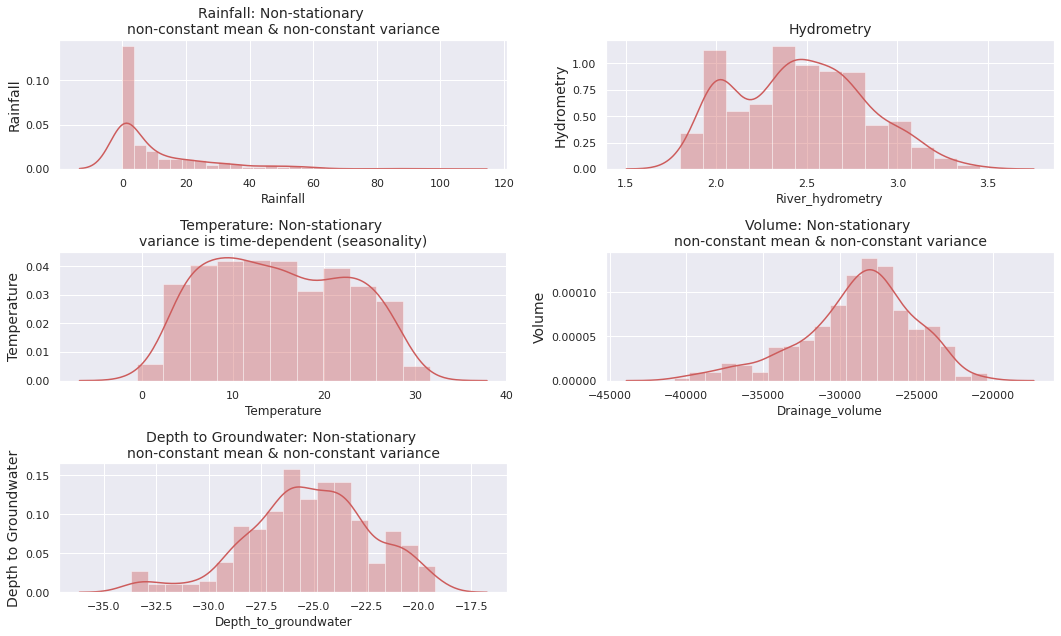

In [492]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

sns.distplot(df.Rainfall.fillna(np.inf), ax=ax[0, 0], color='indianred')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.distplot(df.Temperature.fillna(np.inf), ax=ax[1, 0], color='indianred')
ax[1, 0].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Temperature', fontsize=14)

sns.distplot(df.River_hydrometry.fillna(np.inf), ax=ax[0, 1], color='indianred')
#ax[0, 1].set_title('Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_title('Hydrometry', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.distplot(df.Drainage_volume.fillna(np.inf), ax=ax[1, 1], color='indianred')
ax[1, 1].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='Volume', fontsize=14)

sns.distplot(df.Depth_to_groundwater.fillna(np.inf), ax=ax[2, 0], color='indianred')
ax[2, 0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()


### Augmented Dickey Fuller test

To reject the null hypothesis either the p-value should be less than the default significance level of 5% or the test statistic is less than the critical value.

In [493]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Depth_to_groundwater.values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']
print('result is :', result , '\nP-Value is : ', result[1])

result is : (-2.880201649316664, 0.047699190920208426, 7, 592, {'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}, -734.3154255877625) 
P-Value is :  0.047699190920208426


In [494]:
adf_stat

-2.880201649316664

P - Value is less than 5%, now can check test statistic


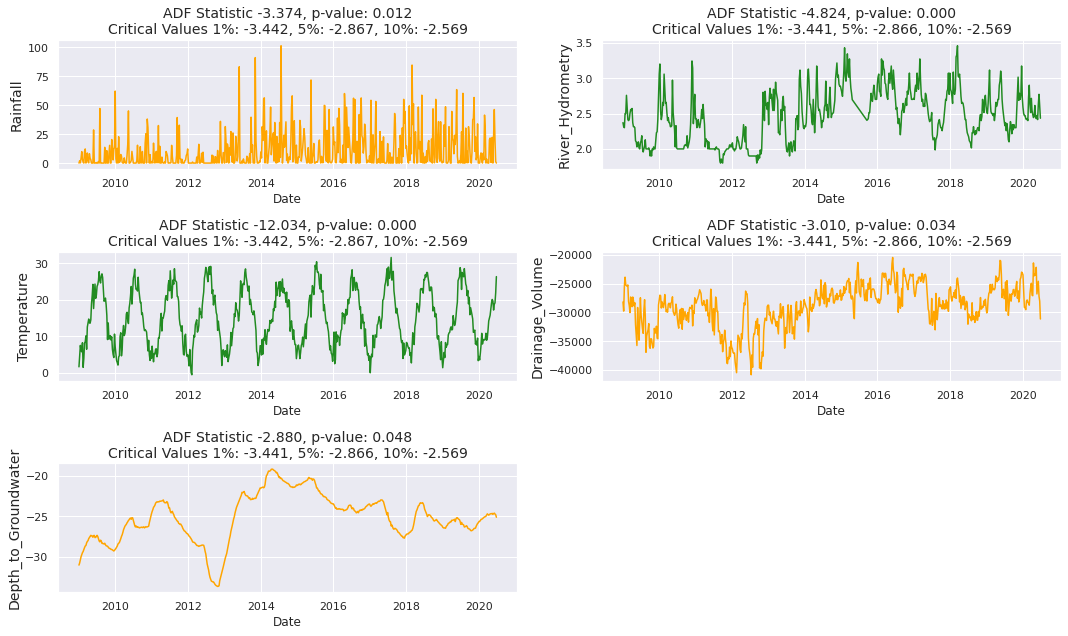

In [495]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['Rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['Temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['River_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['Drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['Depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

# Transforming

The two most common methods to transform series into stationarity are:

Transformation: Using log or square root to stabilize the non-constant variance.

Differencing: subtracts the current value from the previous one. Differencing can be done in different orders like first-order differencing(will have linear trend), second-order differencing(will have quadratic trends), etc.

Differencing can be done in different orders:
* First order differencing: linear trends with $z_i = y_i - y_{i-1}$
* Second-order differencing: quadratic trends with $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
* and so on...

In [496]:
# Log Transform of absolute values
df['Depth_to_groundwater_log'] = np.log(abs(df.Depth_to_groundwater))

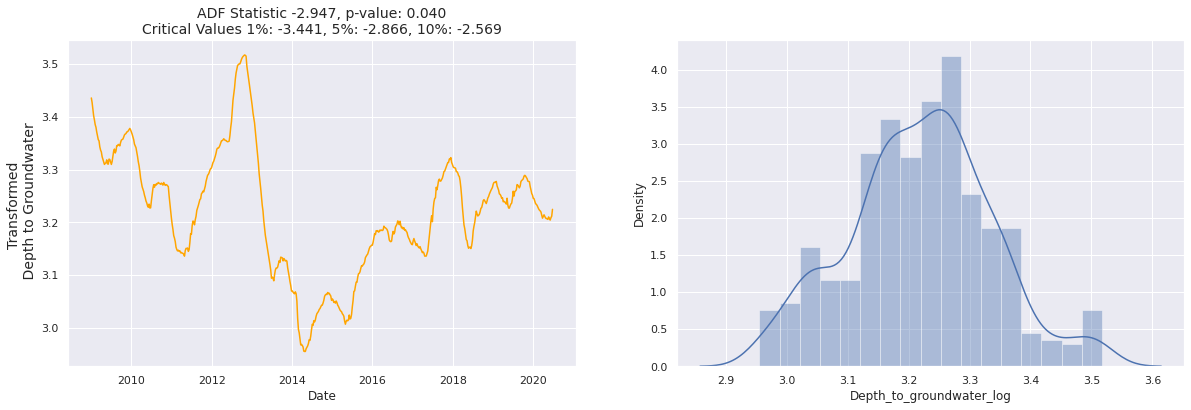

In [497]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df['Depth_to_groundwater_log'], ax=ax[1])

Differencing

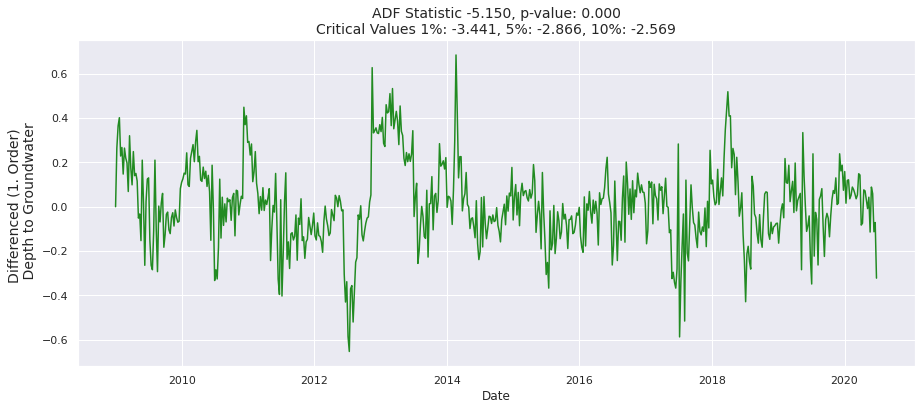

In [498]:
# First Order Differencing
ts_diff = np.diff(df['Depth_to_groundwater'])
df['Depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['Depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

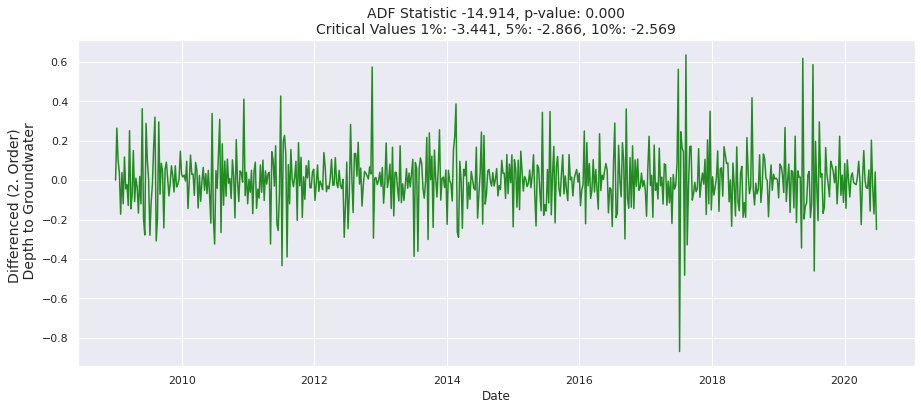

In [499]:
# Second Order Differencing
ts_diff = np.diff(df.Depth_to_groundwater_diff_1)
df['Depth_to_groundwater_diff_2'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['Depth_to_groundwater_diff_2'], 'Differenced (2. Order) \n Depth to Groundwater', ax)

The differencing can be reverted if the the first value before differencing is known. In this case, we can accumulate all values with the function `.cumsum()` and add the first value of the original time series.

In [500]:
df.Depth_to_groundwater.equals(df.Depth_to_groundwater_diff_1.cumsum() + df.Depth_to_groundwater.iloc[0])


True

# Feature Engineering

Time Features

In [501]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df.month%12 // 3 + 1

df[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,Date,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,2009,1,1,1,1,1,1
1,2009-01-08,2009,1,8,8,2,1,1
2,2009-01-15,2009,1,15,15,3,1,1
3,2009-01-22,2009,1,22,22,4,1,1
4,2009-01-29,2009,1,29,29,5,1,1


## Encoding Cyclical Features 
The new time features are cyclical. For example,the feature `month` cycles between 1 and 12 for every year.
While the difference between each month increments by 1 during the year, between two years the `month` feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

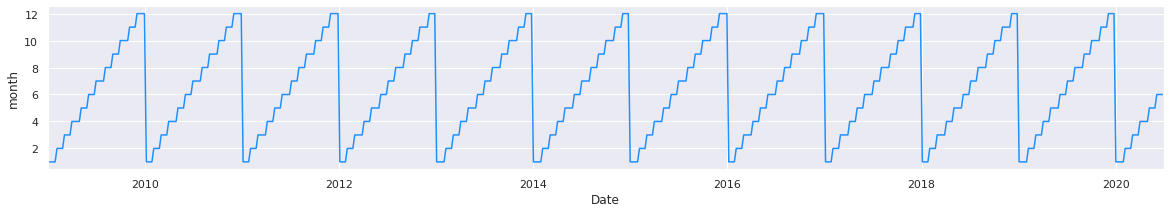

In [502]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['Date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

Ideally, we want the underlying data to represent the same difference between two consecutive months, even between December and January. A common remedy for this issue is to encode cyclical features into two dimensions with sine and cosine transformation.

## Decomposition

In [503]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['Rainfall', 'Temperature', 
                   'Drainage_volume', 
                   'River_hydrometry', 'Depth_to_groundwater']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], freq=52, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

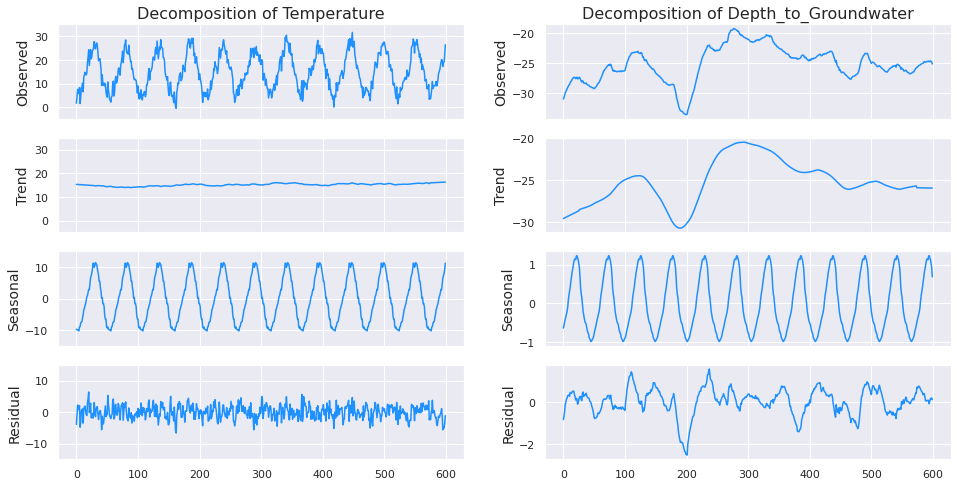

In [504]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df.Temperature, freq=52, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of Temperature', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=14)
ax[0,0].set_ylim([-5, 35])

res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=14)
ax[1,0].set_ylim([-5, 35])

res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=14)
ax[2,0].set_ylim([-15, 15])

res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=14)
ax[3,0].set_ylim([-15, 15])

ax[0,1].set_title('Decomposition of Depth_to_Groundwater', fontsize=16)
res = seasonal_decompose(df.Depth_to_groundwater, freq=52, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()

In [505]:
df[['Rainfall', 'Rainfall_trend', 'Rainfall_seasonal', 
          'Temperature', 'Temperature_trend', 'Temperature_seasonal', 
          'Drainage_volume', 'Drainage_volume_trend', 'Drainage_volume_seasonal',
          'River_hydrometry', 'River_hydrometry_trend', 'River_hydrometry_seasonal', 
          'Depth_to_groundwater', 'Depth_to_groundwater_trend', 'Depth_to_groundwater_seasonal']].head()\
.style.set_properties(subset=['Rainfall_trend', 'Rainfall_seasonal', 
                              'Temperature_trend', 'Temperature_seasonal', 
                              'Drainage_volume_trend', 'Drainage_volume_seasonal', 
                              'River_hydrometry_trend', 'River_hydrometry_seasonal',
                              'Depth_to_groundwater_trend', 'Depth_to_groundwater_seasonal'
                             ], **{'background-color': 'dodgerblue'})

,Rainfall,Rainfall_trend,Rainfall_seasonal,Temperature,Temperature_trend,Temperature_seasonal,Drainage_volume,Drainage_volume_trend,Drainage_volume_seasonal,River_hydrometry,River_hydrometry_trend,River_hydrometry_seasonal,Depth_to_groundwater,Depth_to_groundwater_trend,Depth_to_groundwater_seasonal
0,0.000000,5.644061,4.822633,1.657143,15.329959,-9.739920,-28164.918857,-32404.467037,1551.335303,2.371429,2.164913,0.207547,-31.048571,-29.571657,-0.643767
1,2.000000,5.663654,-5.096388,4.571429,15.312814,-9.838787,-29755.789714,-32374.371773,938.070633,2.314286,2.167252,0.186527,-30.784286,-29.535110,-0.572078
2,0.200000,5.683247,-5.019971,7.528571,15.295668,-10.002955,-25463.190857,-32344.276508,832.934327,2.300000,2.169592,0.105423,-30.420000,-29.498564,-0.484281
3,4.100000,5.702840,3.454367,6.214286,15.278522,-9.973161,-23854.422857,-32314.181244,518.836188,2.500000,2.171931,0.131993,-30.018571,-29.462017,-0.417712
4,9.900000,5.722433,-3.895493,5.771429,15.261377,-10.246938,-25210.532571,-32284.085980,238.454010,2.500000,2.174270,0.152668,-29.790000,-29.425470,-0.362900


Lag

In [506]:
weeks_in_month = 4

df['Temperature_seasonal_shift_r_2M'] = df.Temperature_seasonal.shift(-2*weeks_in_month)
df['Temperature_seasonal_shift_r_1M'] = df.Temperature_seasonal.shift(-1*weeks_in_month)
df['Temperature_seasonal_shift_1M'] = df.Temperature_seasonal.shift(1*weeks_in_month)
df['Temperature_seasonal_shift_2M'] = df.Temperature_seasonal.shift(2*weeks_in_month)
df['Temperature_seasonal_shift_3M'] = df.Temperature_seasonal.shift(3*weeks_in_month)

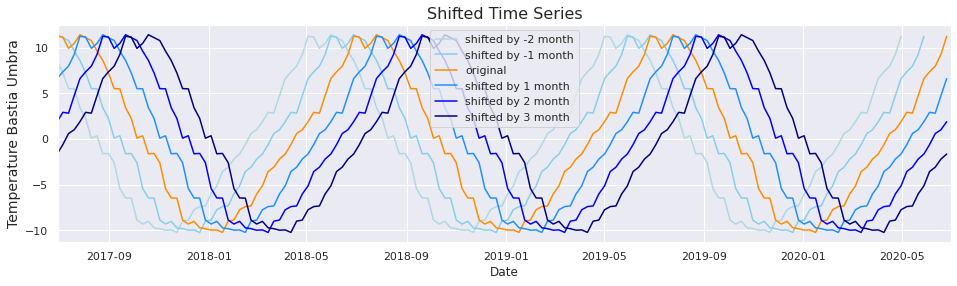

In [507]:
df['Drainage_volume_seasonal_shift_r_2M'] = df.Drainage_volume_seasonal.shift(-2*weeks_in_month)
df['Drainage_volume_seasonal_shift_r_1M'] = df.Drainage_volume_seasonal.shift(-1*weeks_in_month)
df['Drainage_volume_seasonal_shift_1M'] = df.Drainage_volume_seasonal.shift(1*weeks_in_month)
df['Drainage_volume_seasonal_shift_2M'] = df.Drainage_volume_seasonal.shift(2*weeks_in_month)
df['Drainage_volume_seasonal_shift_3M'] = df.Drainage_volume_seasonal.shift(3*weeks_in_month)

df['River_hydrometry_seasonal_shift_r_2M'] = df.River_hydrometry_seasonal.shift(-2*weeks_in_month)
df['River_hydrometry_seasonal_shift_r_1M'] = df.River_hydrometry_seasonal.shift(-1*weeks_in_month)
df['River_hydrometry_seasonal_shift_1M'] = df.River_hydrometry_seasonal.shift(1*weeks_in_month)
df['River_hydrometry_seasonal_shift_2M'] = df.River_hydrometry_seasonal.shift(2*weeks_in_month)
df['River_hydrometry_seasonal_shift_3M'] = df.River_hydrometry_seasonal.shift(3*weeks_in_month)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_r_2M, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_r_1M, label='shifted by -1 month', ax=ax, color='skyblue')

sns.lineplot(x=df.Date, y=df.Temperature_seasonal, label='original', ax=ax, color='darkorange')

sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_1M, label='shifted by 1 month', ax=ax, color='dodgerblue')
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_2M, label='shifted by 2 month', ax=ax, color='blue')
sns.lineplot(x=df.Date, y=df.Temperature_seasonal_shift_3M, label='shifted by 3 month', ax=ax, color='navy')

ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2017, 6, 30), date(2020, 6, 30)])
ax.set_ylabel(ylabel='Temperature Bastia Umbra', fontsize=14)

plt.show()

##Exploratory Data Analysis


Let's begin by plotting the seasonal components of each feature and comparing the minima and maxima. By doing this, we can already gain some insights:

The depth to groundwater reaches its maximum around May/June and its minimum around November/December

The temperature reaches its maxmium around August and its minimum around January

The volume reaches its maximum around June and its minimum around August/September. It takes longer to reach its maximum than to reach its minimum.

The hydrometry reaches its maximum around March and its minimum around September

The volume and hydrometry reach their minimum roughly around the same time

The volume and hydrometry reach their minimum when the temperature reaches its maximum

Temperature lags begind depth to groundwater by around 2 to 3 months

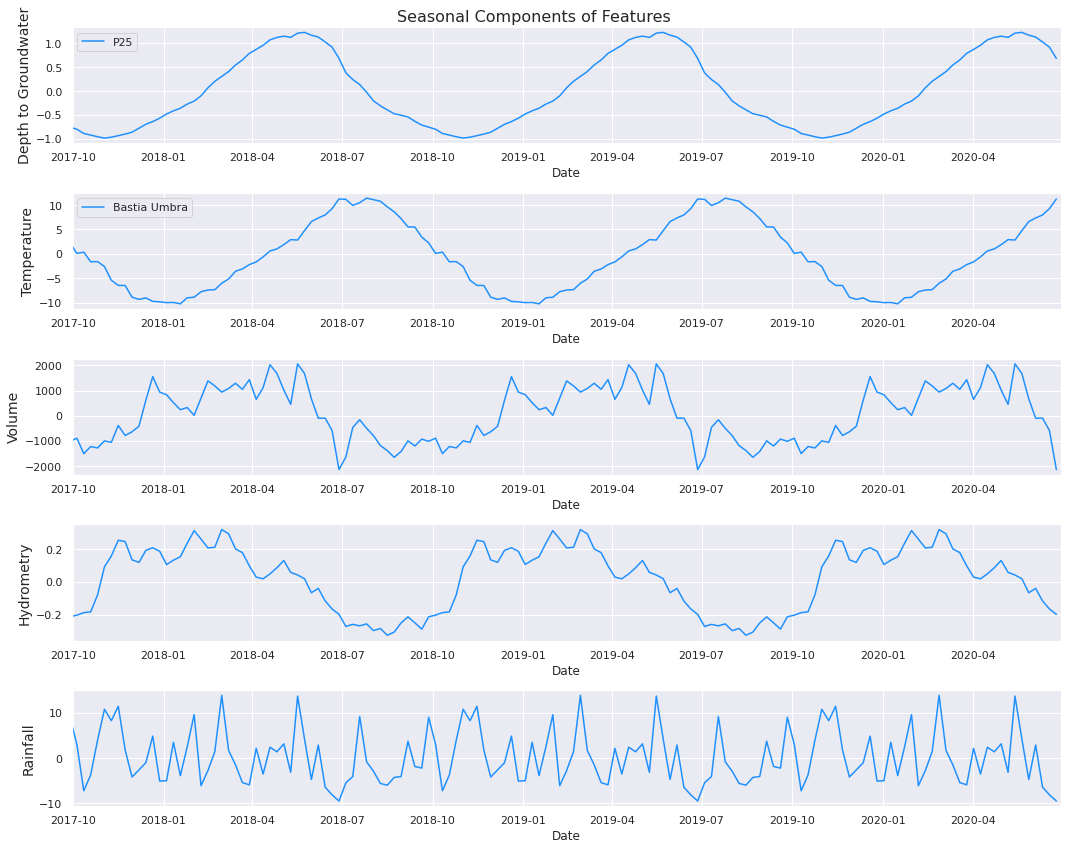

In [508]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.Date, y=df.Depth_to_groundwater_seasonal, ax=ax[0], color='dodgerblue', label='P25')
ax[0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

sns.lineplot(x=df.Date, y=df.Temperature_seasonal, ax=ax[1], color='dodgerblue', label='Bastia Umbra')
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=df.Date, y=df.Drainage_volume_seasonal, ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.Date, y=df.River_hydrometry_seasonal, ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df.Date, y=df.Rainfall_seasonal, ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='Rainfall', fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

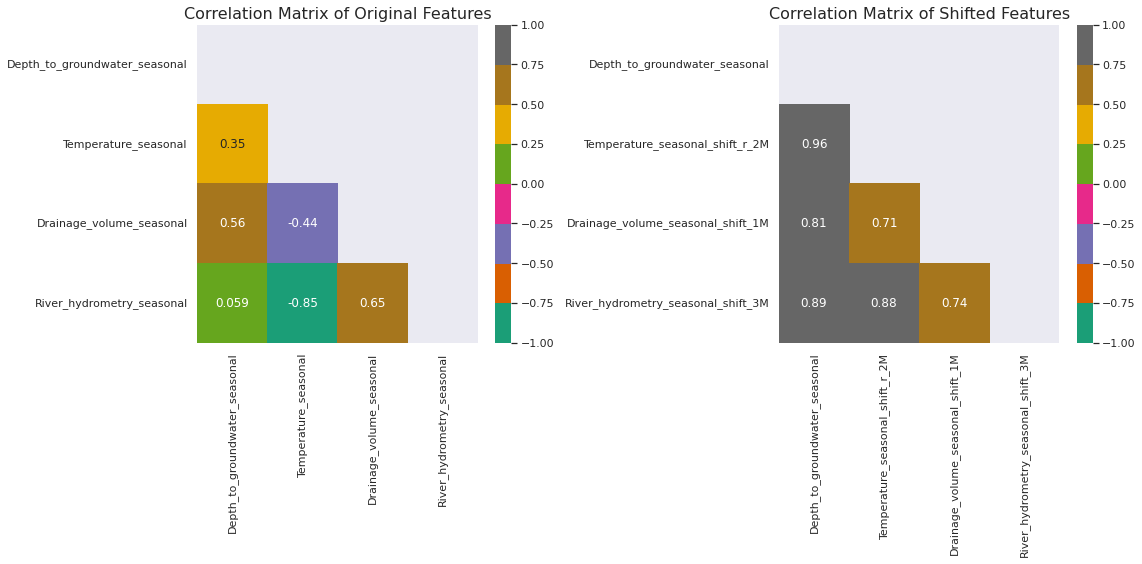

In [509]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

original_cols = ['Depth_to_groundwater_seasonal', 
                 'Temperature_seasonal',
                 'Drainage_volume_seasonal', 'River_hydrometry_seasonal']

corrmat = df[original_cols].corr()
mask = np.triu(np.ones_like(df[original_cols].corr(), dtype=bool))

sns.heatmap(corrmat, annot=True, mask = mask,vmin=-1, vmax=1, cmap='Dark2', ax=ax[0])
ax[0].set_title('Correlation Matrix of Original Features', fontsize=16)

shifted_cols = [ 'Depth_to_groundwater_seasonal', 
                'Temperature_seasonal_shift_r_2M',
                'Drainage_volume_seasonal_shift_1M', 'River_hydrometry_seasonal_shift_3M']
corrmat1 = df[shifted_cols].corr()
mask1 = np.triu(np.ones_like(df[shifted_cols].corr(), dtype=bool))

sns.heatmap(corrmat1, annot=True, mask = mask1, vmin=-1, vmax=1, cmap='Dark2', ax=ax[1])
ax[1].set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()

# Autocorrelation Analysis

Autocorrelation Analysis is essential when doing ARIMA model because it helps to identify AR and MA part of ARIMA model.

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. 

Autocorrelation Function (ACF): Correlation between time series with a lagged version of itself. The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. -> MA parameter is q significant lags
Partial Autocorrelation Function (PACF): Additional correlation explained by each successive lagged term -> AR parameter is p significant lags

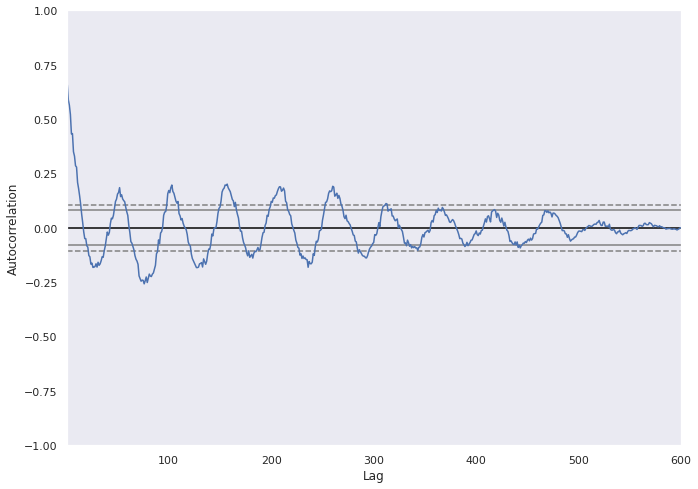

In [510]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Depth_to_groundwater_diff_1)
plt.show()

The sinusoidal shape in both ACF and PACF functions. This suggests that both AR and MA processes are present.

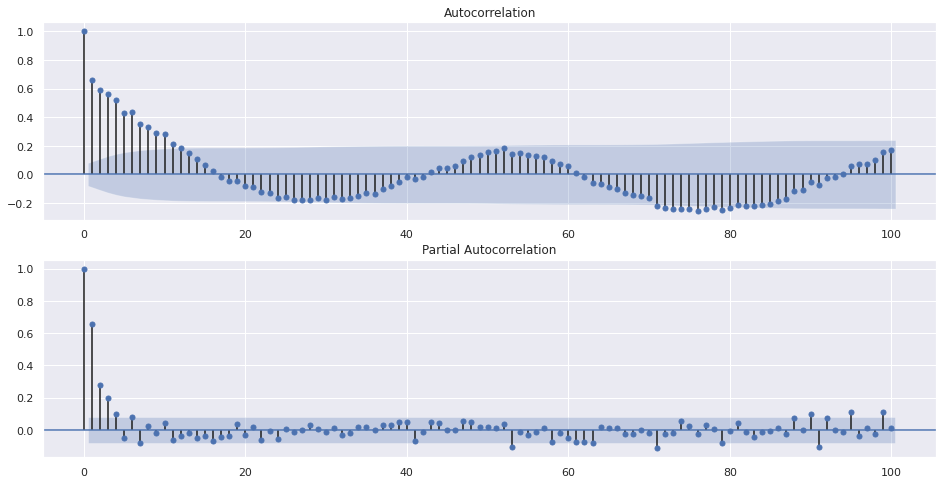

In [511]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.Depth_to_groundwater_diff_1,lags=100, ax=ax[0])
plot_pacf(df.Depth_to_groundwater_diff_1,lags=100, ax=ax[1])
plt.show()

Models


* ARIMA
* LSTM




# CrossValidation - 


In [513]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.Date
y = df.Depth_to_groundwater

folds = TimeSeriesSplit(n_splits=N_SPLITS)

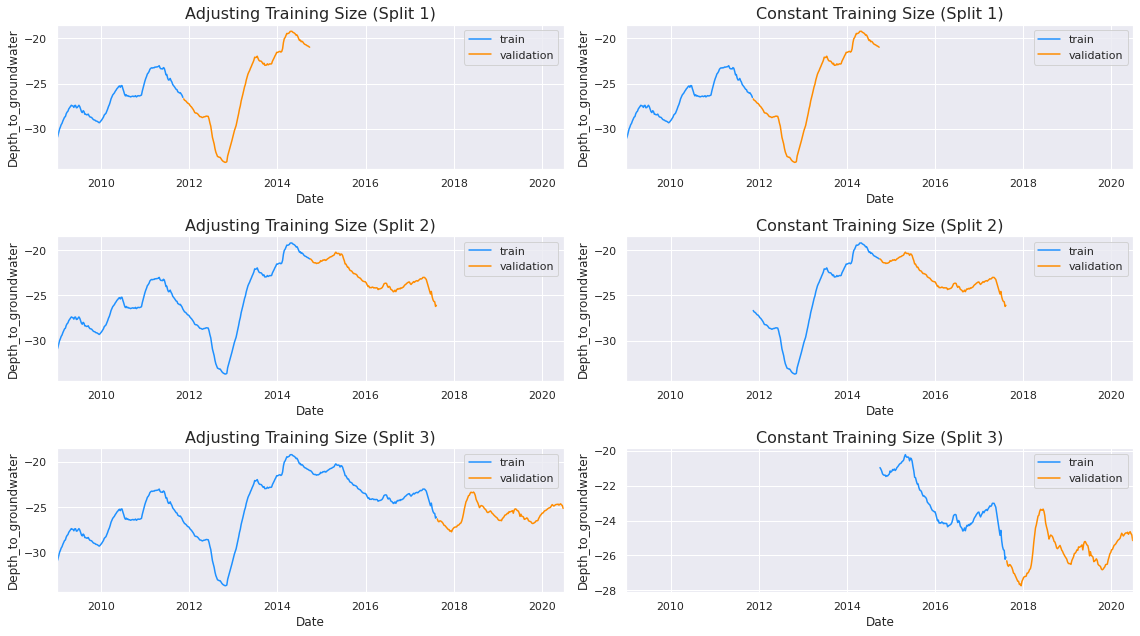

In [514]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

In [515]:
df['quarter_idx'] = (df.quarter != df.quarter.shift(1)).cumsum()

target = 'Depth_to_groundwater'
features = [feature for feature in df.columns if feature != target]

N_SPLITS = 46

X = df[df.quarter_idx < N_SPLITS][features]
y = df[df.quarter_idx < N_SPLITS][target]

X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

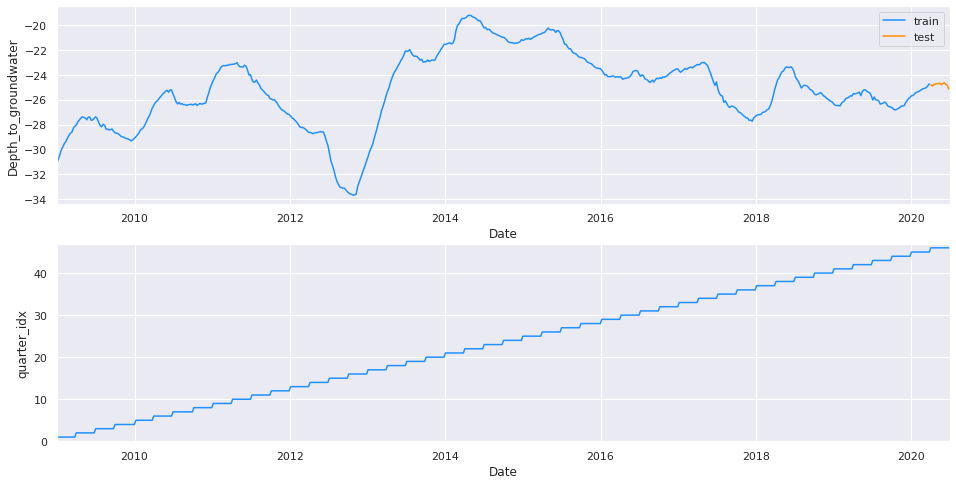

In [516]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.Date, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_ylim([0, N_SPLITS+1])
#ax[0].set_ylim([-28, -23])

plt.show()

In [517]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.Date, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
    ax[0].set_ylim([-27, -23])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Depth to Groundwater P25', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([0, 4])   
    plt.show()

#Naive Approach
𝑦̂ 𝑡+1=𝑦𝑡

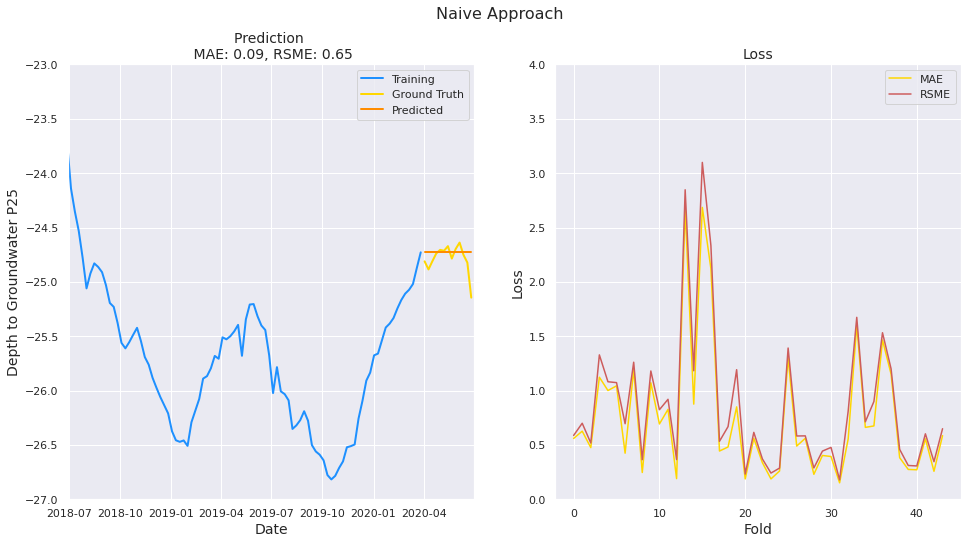

In [518]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')

# Moving Average

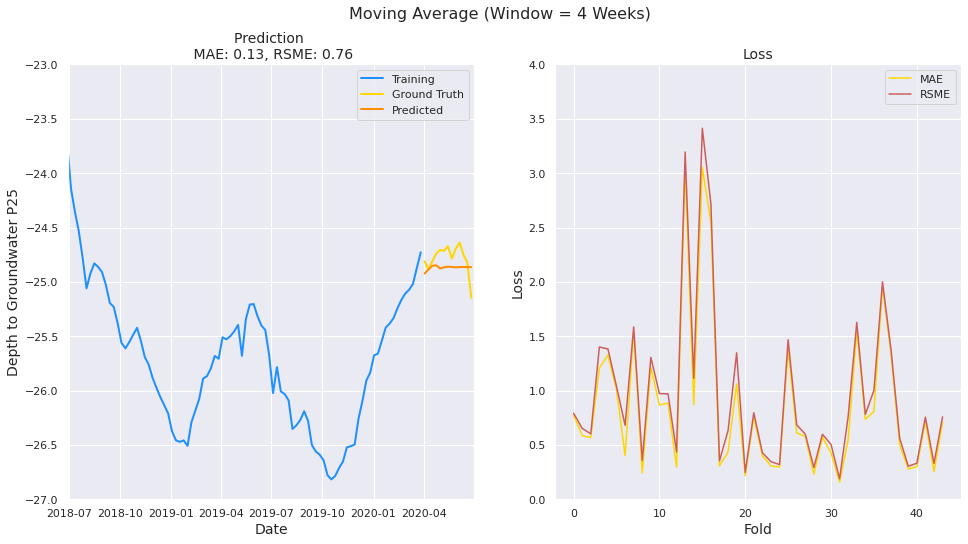

In [519]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach    
    for i in range(len(y_valid_pred)):
        y_valid_pred.iloc[i] = y_train.append(y_valid_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
        
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.zeros(len(X_test)))

for i in range(len(y_pred)):
    y_pred.iloc[i] = y.append(y_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Moving Average (Window = 4 Weeks)')

#LSTM 

In [709]:
from tensorflow import keras 
from tensorflow.keras.utils import plot_model 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import optimizers

In [710]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['Date', 'Depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

510 90


In [711]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.81796644],
       [-0.79970385],
       [-0.7745311 ],
       [-0.74679171],
       [-0.73099704],
       [-0.71253702],
       [-0.7023692 ],
       [-0.68410661],
       [-0.66890424],
       [-0.65528134]])

In [712]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [713]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

406 90


In [714]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, 
               input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=4, epochs=5,  
          validation_split = 0.2,callbacks=[es_callback])

model.summary()

Epoch 1/5
81/81 [==============================] - 7s 21ms/step - loss: 0.0306 - val_loss: 0.0040
Epoch 2/5
81/81 [==============================] - 1s 6ms/step - loss: 0.0083 - val_loss: 0.0017
Epoch 3/5
81/81 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 4/5
81/81 [==============================] - 1s 6ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 5/5
81/81 [==============================] - 1s 7ms/step - loss: 0.0037 - val_loss: 0.0020
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 1, 128)            92672     
                                                                 
 dropout_40 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_59 (LSTM)              (None, 64)                49408     
                             

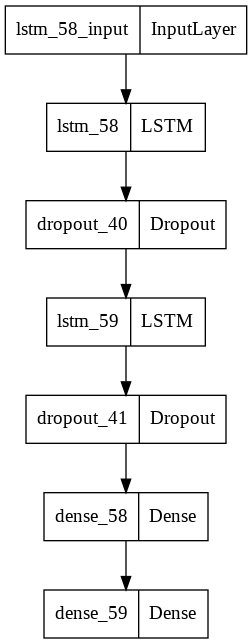

In [715]:
plot_model(model, to_file='model.png')

In [716]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 0.5931545753325254


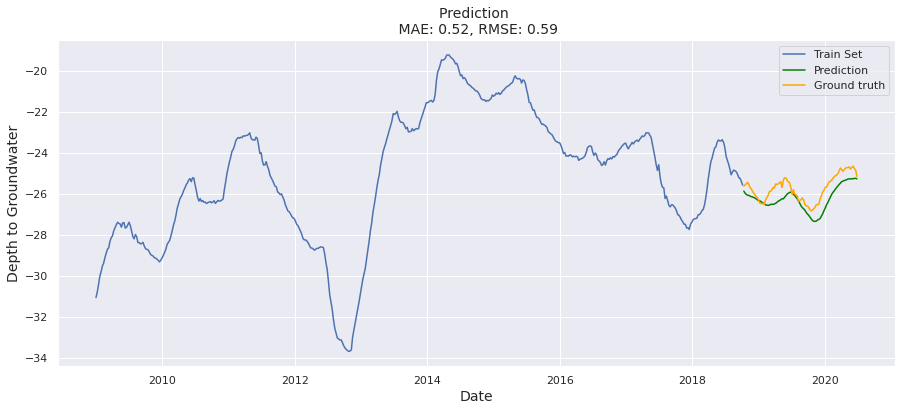

In [717]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [718]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


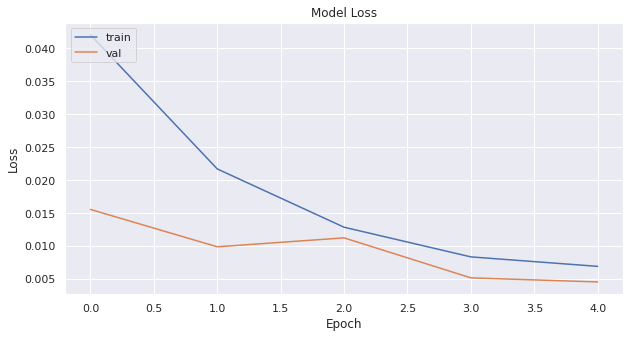

In [719]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()